/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


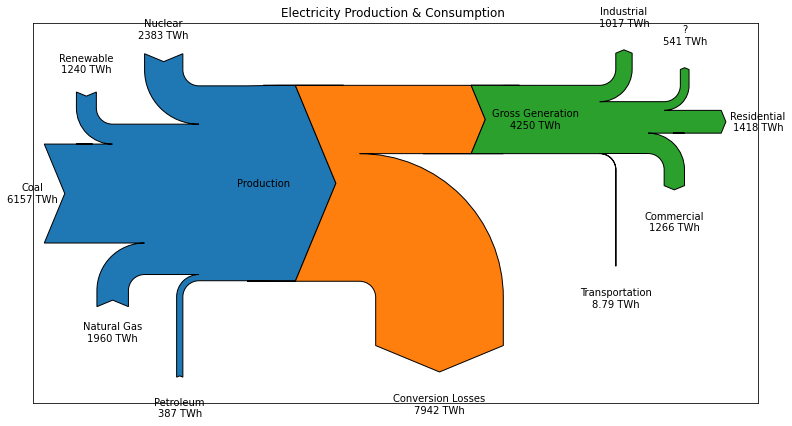

In [2]:
#import libraries
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

fig = plt.figure(figsize = (13, 7), frameon = False)
ax = fig.add_subplot(1, 1, 1, xticks = [], yticks = [], title='Electricity Production & Consumption '
                     )
g = [-12192, 6157, 1960, 387, 2383, 1240]              # generated
c = [4250, -7942, -1418, -1266, -1017, -8.79]          # consumed
sankey = Sankey(ax = ax, 
        format = '%.5G', 
        head_angle = 135,  
        unit = ' TWh', 
        gap = 0.3, 
        scale = 0.0001,
        margin = 0.0,
        offset = 0.2,
        shoulder = 0.0)

sankey.add(
    patchlabel = 'Production',
    flows = g,
    orientations = [0, 0, -1, -1, 1, 1], 
    labels = [None, 'Coal', 'Natural Gas', 'Petroleum', 'Nuclear', 'Renewable'],
    pathlengths = [0.0, 0.2, 0.2, 0.6, 0.2, 0.2]
    )

sankey.add(
    flows = [12192, -4250, -7942],
    orientations = [0, 0, -1],
    labels = [None, None, 'Conversion Losses'],
    pathlengths = [-.2, -.2, 0.4],
    # trunklength = 1.0,
    prior = 0,
    connect = (0, 0))       # denotes which flow index from the prior to connect to which flow index in this one

sankey.add(
    patchlabel = 'Gross Generation\n4250 TWh',
    flows = [4250, -1418, -1266, -1017, -8.79, -541],
    orientations = [0, 0, -1, 1, -1, 1],
    labels = [None, 'Residential', 'Commercial', 'Industrial', 'Transportation', '?'],
    prior = 1,
    pathlengths = [0.2, 0.2, 0.2, 0.2, 0.7, 0.2],
    # trunklength = 2.5,
    connect = (1, 0)
)


plt.savefig('./Electrical_Energy_Prod_Cons.png', 
                dpi = 300, 
                frameon = None,
                transparent = True,
                scale = 0.0001)
sankey.finish()
plt.show()
